In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement).order_by(measurement.date.desc()).first()
most_recent_date.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1737ad5a4c0>,
 'prcp': 0.0,
 'id': 2724,
 'station': 'USC00519397',
 'tobs': 81.0,
 'date': '2017-08-23'}

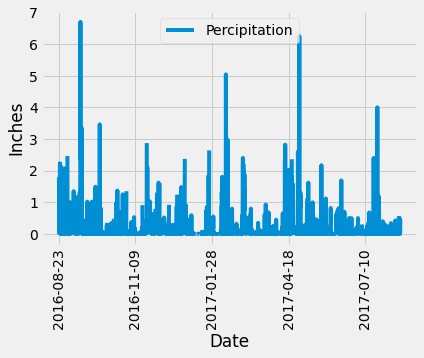

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_search = "2016-08-23"

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= date_search).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp = pd.DataFrame(prcp_query, columns= {"Date", "Percipitation"})
df_prcp = df_prcp.set_index("Date")

# Sort the dataframe by date
df_prcp = df_prcp.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df_prcp.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.grid(linestyle='-')
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
station_number = session.query(station.id).count()
station_number

9

In [18]:
##Rough Draft
first_date = session.query(station).first()
first_date.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1737ad54940>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#station_count = session.query(measurment.id, func.count(measurment.id).group_by(measurement).filter(station.station).count()
station_count = session.query(measurement.station, func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_count
active_station = station_count[0][0]
active_station

'USC00519281'

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#lowest_temperature_as = session.query(func.min(measurement.tobs)).filter(measurement.station == active_station).all()
#highest_temperature_as = session.query(func.max(measurement.tobs)).filter(measurement.station == active_station).all()
#average_temperature_as = session.query(func.avg(measurement.tobs)).filter(measurement.station == active_station).all()
temperature_as = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station == active_station).all()
temperature_as

[(54.0, 85.0, 71.66378066378067)]

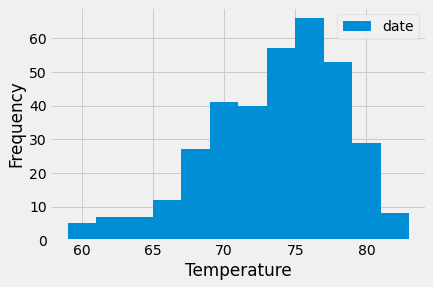

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station

temperature_as_year = session.query(measurement.date, measurement.tobs).filter(measurement.station == active_station).\
    filter(measurement.date >= date_search).all()
#temperature_as_year
temperature_df = pd.DataFrame(temperature_as_year, columns= {"date", "tobs"})

temperature_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [22]:
# Close Session
session.close()